In [122]:
# -*- coding: utf-8 -*-
"""
Created on Mon Apr 25 13:47:33 2022

@author: Alexander
"""

import matplotlib.pyplot as plt
# Bibliotheken
import numpy as np
import pandas as pd
from scipy.io import wavfile
# from scipy import signal as sig
from scipy.signal import butter
from scipy.signal import sosfilt


In [123]:

'''
Moving Average-Filter
Achtung!!! Anzahl an Sampels wird um k-1 verringert '''


df = pd.read_csv(r'data\csv\-295-5-output.csv')




In [124]:
sample_in_ms= 2/96000


2


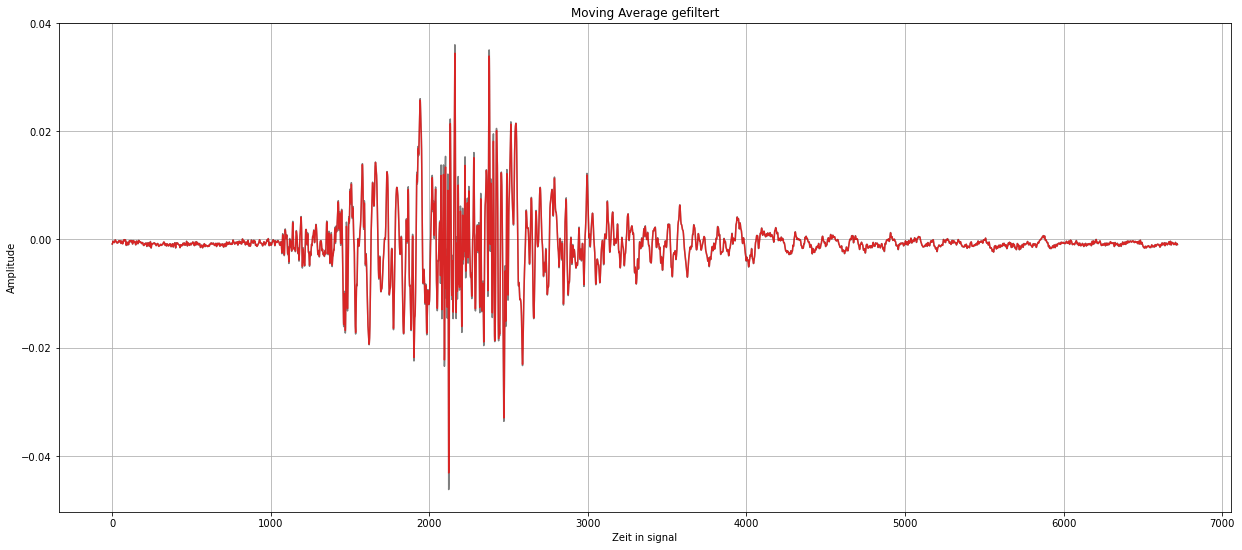

In [125]:
# Fenstergröße k festlegen (nur ungerade k erlaubt!!!)
window_size = 3


# übergabe des Signals und convertierung in pandas Series
numbers_series = df.iloc[3,5:-1].copy()
numbers_series = pd.Series(numbers_series.to_list())

#Auschneidern der Beobachtungsreihe entsprechend der Fenstergröße
windows = numbers_series.rolling(window_size)
# Mittelwert jedes Ausschnittes bilden
moving_averages = windows.mean()
# NaN entfernen
moving_averages = moving_averages[window_size - 1:]

t = np.arange( 0,len(numbers_series),1)
#plot Ticken
plt.figure(figsize=(21,9))
plt.plot(t, numbers_series,alpha = 0.5,c='k')
plt.plot(t[(window_size//2):-(window_size//2)], moving_averages, alpha = 0.7, c = 'r')
print(numbers_series.shape[0] - moving_averages.shape[0])

plt.grid(True)
plt.xlabel('Zeit in signal')
plt.ylabel('Amplitude')
plt.title('Moving Average gefiltert')
plt.show()

In [126]:
pandaroll = df.iloc[:,5:-1].copy()
#newdf = pandaroll.rolling(window=5).mean()
newseries = pandaroll.iloc[3]
newseries.dropna(inplace=True)



In [127]:
print(newdf.iloc[3], pandaroll.iloc[3])

0      -0.000690
1      -0.000684
2      -0.000684
3      -0.000696
4      -0.000671
          ...   
6714   -0.000922
6715   -0.000928
6716   -0.000934
6717   -0.000922
6718   -0.000897
Name: 7, Length: 6719, dtype: float64 0      -0.000854
1      -0.000854
2      -0.000732
3      -0.000610
4      -0.000397
          ...   
6714   -0.000793
6715   -0.000732
6716   -0.000824
6717   -0.000885
6718   -0.000946
Name: 3, Length: 6719, dtype: float64


In [128]:
import scipy

pandaroll = df.iloc[:,5:-1].copy()
#newdf = pandaroll.rolling(window=5).mean()
newseries = pandaroll.iloc[3]
newseries.dropna(inplace=True)
fullsample = newseries.to_list()



secs = len(fullsample)/48000.0 # Number of seconds in signal X
samps = secs*16e3     # Number of samples to downsample
downsample = scipy.signal.resample(fullsample, int(samps))

In [129]:
print(downsample, fullsample)

[-0.00092111 -0.00056058 -0.00032498 ... -0.00101193 -0.00086914
 -0.00080218] [-0.0008544922, -0.0008544922, -0.0007324219, -0.00061035156, -0.00039672852, -0.00030517578, -0.00033569336, -0.00036621094, -0.00039672852, -0.00039672852, -0.00039672852, -0.0004272461, -0.00045776367, -0.0005187988, -0.000579834, -0.0005493164, -0.00045776367, -0.00030517578, -0.00015258789, -6.1035156e-05, -9.1552734e-05, -0.00018310547, -0.00024414062, -0.00033569336, -0.00036621094, -0.00036621094, -0.00036621094, -0.0004272461, -0.00048828125, -0.00061035156, -0.00064086914, -0.00064086914, -0.00061035156, -0.0005493164, -0.0005493164, -0.0005493164, -0.00061035156, -0.000579834, -0.0005493164, -0.0004272461, -0.00030517578, -0.00024414062, -0.00024414062, -0.00030517578, -0.00036621094, -0.00045776367, -0.0004272461, -0.00036621094, -0.00030517578, -0.00021362305, -0.00021362305, -0.00024414062, -0.00036621094, -0.00048828125, -0.00064086914, -0.0007324219, -0.0007324219, -0.0006713867, -0.000518798

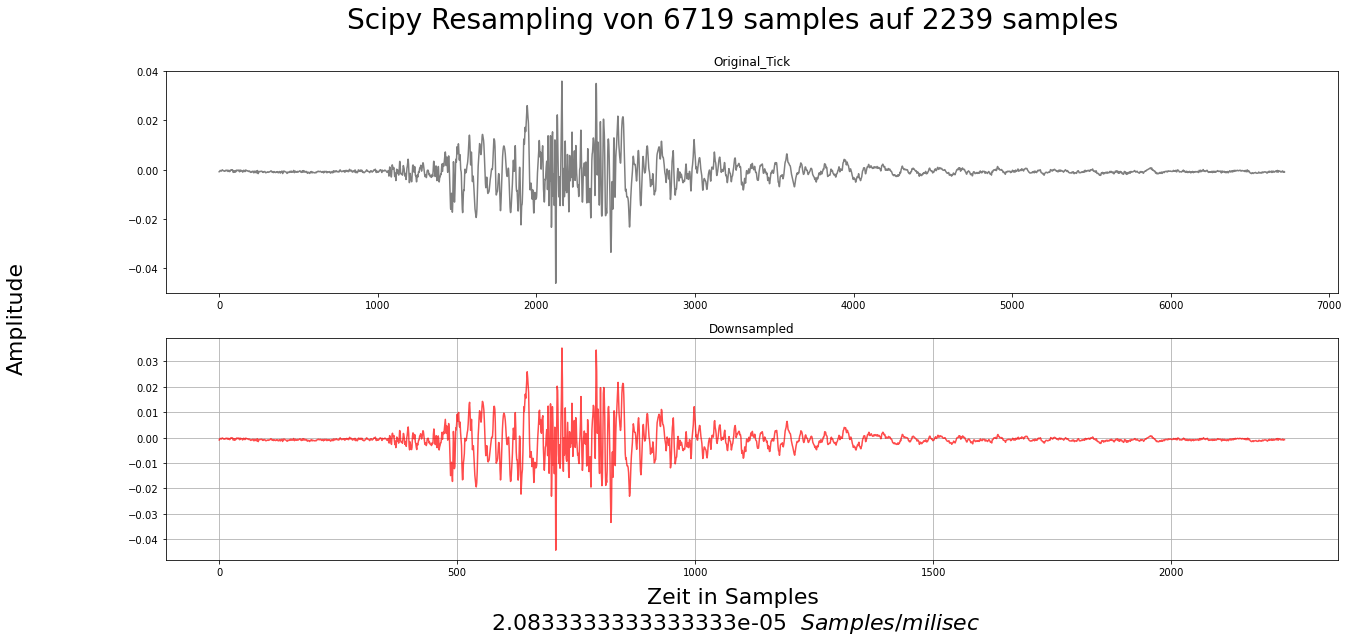

In [130]:
t = np.arange( 0,len(fullsample),1)
#plot Ticken
fig, axs = plt.subplots(2,1,figsize=(21,9))
axs[0].plot(t, fullsample,alpha = 0.5,c='k')
t = np.arange( 0,len(downsample),1)
axs[1].plot(t, downsample, alpha = 0.7, c = 'r')



axs[0].set_title('Original_Tick')
axs[1].set_title('Downsampled')
plt.grid(True)
fig.supxlabel('Zeit in Samples\n {}  $Samples/milisec $'.format(sample_in_ms), fontsize = 22)
fig.supylabel('Amplitude', fontsize = 22)
fig.suptitle('Scipy Resampling von {} samples auf {} samples'.format(int(len(fullsample)),int(samps)), fontsize=28)
plt.show()